In [ ]:
#Task 1

In [ ]:
!pip install rasterio
import rasterio as ro

In [2]:
land_image = ro.open("la_eagleview_small.tif")
land_label = ro.open("training_data_ev.tif")

In [3]:
from rasterio.plot import show

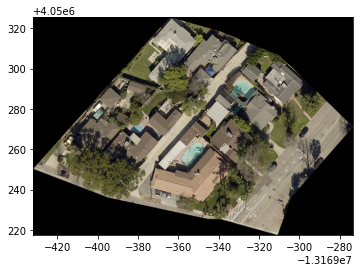

In [4]:
show(land_image)

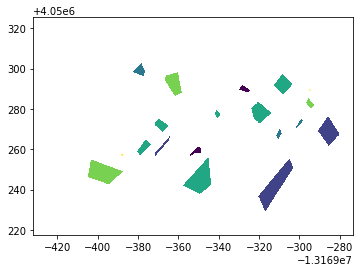

In [5]:
show(land_label)

In [7]:
land_image.width

2122

In [8]:
land_image.height

1444

In [9]:
land_image.count

3

In [10]:
land_label.width

2122

In [11]:
land_label.height

1444

In [12]:
land_label.count

1

In [15]:
import matplotlib.pyplot as plt
import numpy as np


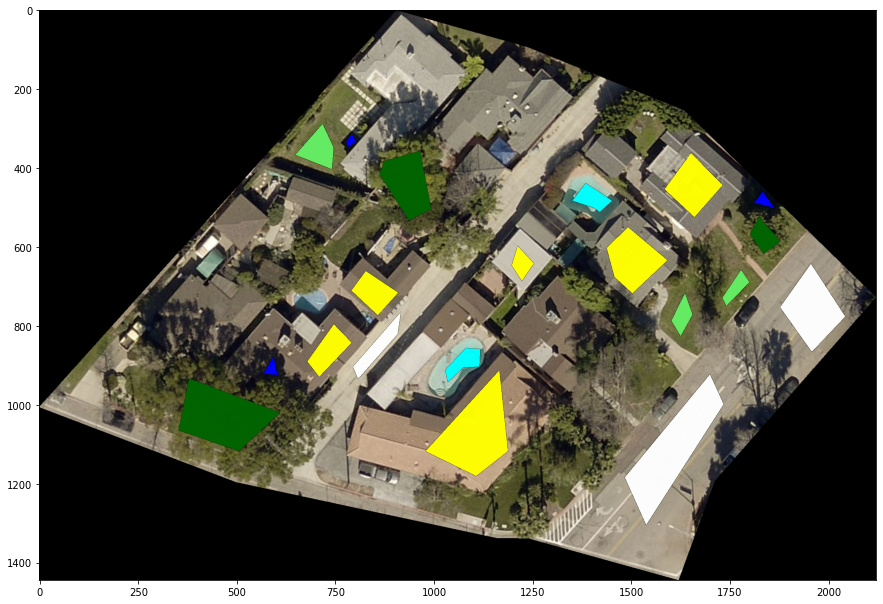

In [16]:
plt.figure(figsize = (15,15))
# show the areial image
blue = land_image.read(3, masked=True)
green = land_image.read(2, masked=True)
red = land_image.read(1, masked=True)
rgb_land = np.dstack((red, green, blue))
plt.imshow(rgb_land)
# show the labeled training data above the image
# create a color palette to color the labels. This is because we may want to use some intuitive
# colors to show the label (e.g., blue for pool)
palette = np.array([[0, 0, 0, 0], # no data
 [0, 255, 255,250], # pool
 [255, 255, 255,250], # street
 [100,238,100,250], #grass
 [255, 255, 0,250], #roof
 [0,100,0,250], #tree
 [0, 0, 255,250] #shadow
 ])
land_label_data = land_label.read(1)
plt.imshow(palette[land_label_data]) 

In [17]:
# Get the labeled training data for each band
red_train = red[land_label_data>0]
blue_train = blue[land_label_data>0]
green_train = green[land_label_data>0]
X_label = np.column_stack((red_train, blue_train,green_train)) # put the three features as
# three columns of the matrix
# Get the labeled value
y_label = land_label_data[land_label_data>0]
# Split to training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size=0.2,
random_state=42)

In [ ]:
#Task 2

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
#Training my random forest model
clf = RandomForestClassifier(min_samples_leaf=10, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=10, random_state=42)

In [27]:
#finding the predictions for the model
y_pred = clf.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [28]:
accuracy_score(y_test, y_pred)
#accuracy score for this model at 0.9553594467667854

0.9553594467667854

In [29]:
confusion_matrix(y_test, y_pred)

array([[ 1524,     0,     0,     1,     0,     0],
       [    0, 11057,     0,   355,    10,     0],
       [    0,     0,  1929,     1,   364,     0],
       [    0,   244,     0, 13835,    56,     0],
       [    0,    12,   609,    61,  8234,    10],
       [    0,     0,     0,     4,     3,   445]])

In [31]:
#Overall Accuracy of the confusion matrix
(1524+11057+1929+13835+8234+445)/38754

0.9553594467667854

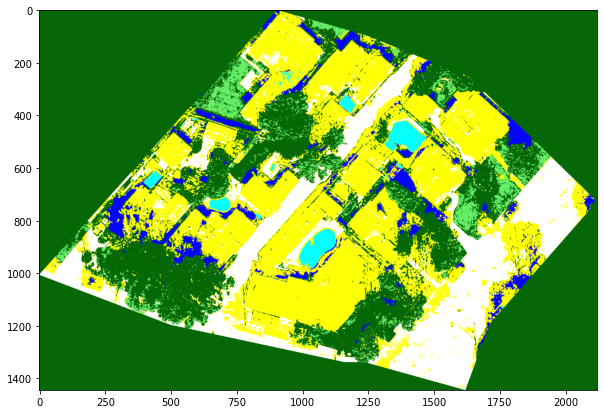

In [25]:
# prepare all the pixels of this image
X_whole = np.column_stack((red.ravel(), blue.ravel(), green.ravel()))
y_whole_pred = clf.predict(X_whole)
# Reshape the prediction result into the shape of the image
y_whole_pred_reshape = y_whole_pred.reshape(land_image.height, land_image.width)
# show classification
plt.figure(figsize=(10,10))
plt.imshow(palette[y_whole_pred_reshape])